In [4]:
import pandas as pd


file_path = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)




In [5]:
print(df.info())
print(df.head())


print(df.isnull().sum())


df['bmi'].fillna(df['bmi'].median(), inplace=True)


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

/var/folders/pc/b07qs1r50j371w3zlgmlzn7c0000gn/T/ipykernel_6559/796291964.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


/var/folders/pc/b07qs1r50j371w3zlgmlzn7c0000gn/T/ipykernel_6559/2630771025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="coolwarm")


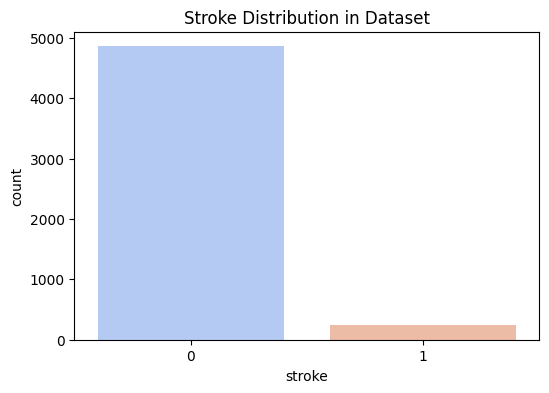

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df, palette="coolwarm")
plt.title("Stroke Distribution in Dataset")
plt.show()


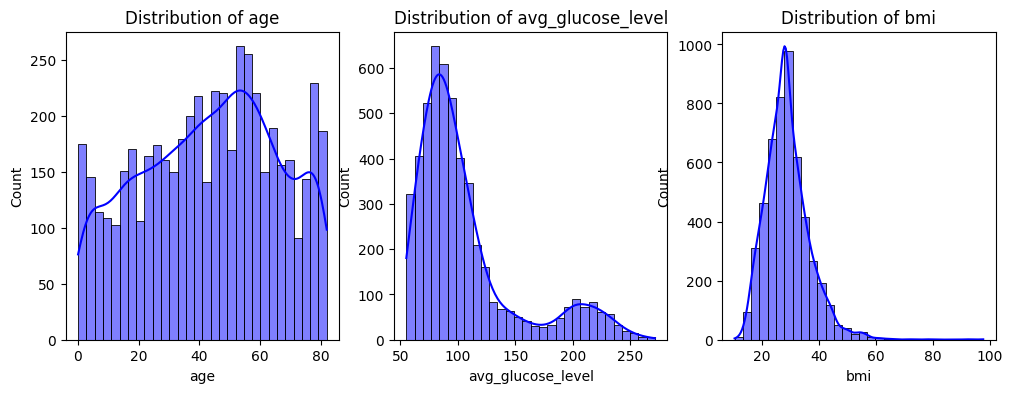

In [7]:
features = ["age", "avg_glucose_level", "bmi"]

plt.figure(figsize=(12,4))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
plt.show()



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


X = df.drop(columns=['stroke'])
y = df['stroke']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (4088, 17), Testing set: (1022, 17)


In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
}


accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9521
Decision Tree Accuracy: 0.9168
Random Forest Accuracy: 0.9501
SVM Accuracy: 0.9511
Gradient Boosting Accuracy: 0.9462


/var/folders/pc/b07qs1r50j371w3zlgmlzn7c0000gn/T/ipykernel_6559/4120857825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


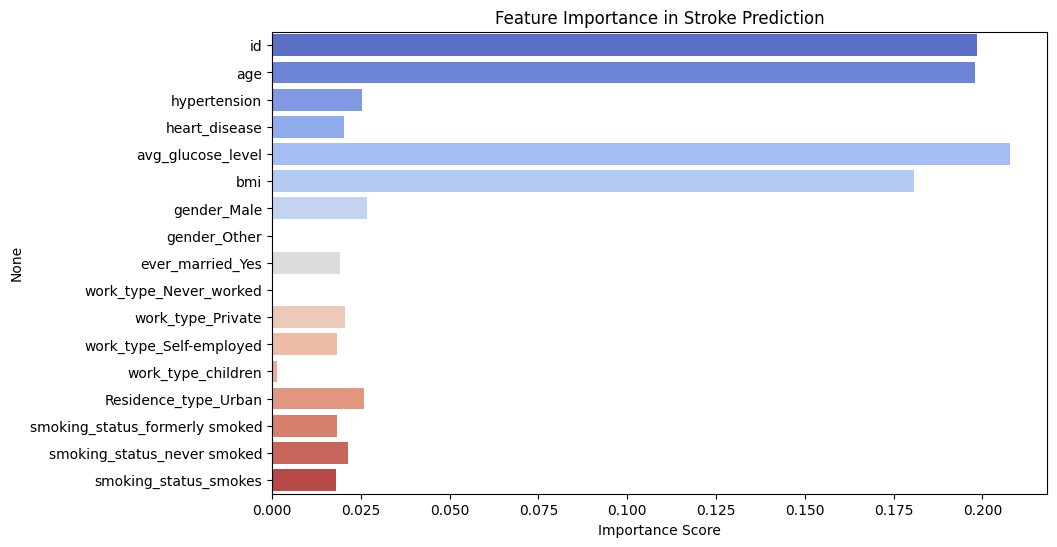

In [11]:
importances = models["Random Forest"].feature_importances_
feature_names = X.columns


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.title("Feature Importance in Stroke Prediction")
plt.xlabel("Importance Score")
plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test)
accuracies["Neural Network"] = test_acc
print(f"Neural Network Accuracy: {test_acc:.4f}")


Epoch 1/20


/Users/rahulmarban/Documents/Coding/nextjs-fastapi/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7976 - loss: 0.4527 - val_accuracy: 0.9511 - val_loss: 0.1870
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1816 - val_accuracy: 0.9511 - val_loss: 0.1681
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9532 - loss: 0.1654 - val_accuracy: 0.9511 - val_loss: 0.1649
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9450 - loss: 0.1764 - val_accuracy: 0.9511 - val_loss: 0.1645
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9553 - loss: 0.1463 - val_accuracy: 0.9511 - val_loss: 0.1633
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.1705 - val_accuracy: 0.9511 - val_loss: 0.1639
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9529 - loss: 0.1474 - val_accuracy: 0.9511 - val_loss: 0.1636
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1616 - val_accuracy: 0.9511 - val_

In [14]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


best_rf_model = grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)


new_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"✅ Tuned Random Forest Accuracy: {new_accuracy:.4f}")


accuracies["Tuned Random Forest"] = new_accuracy


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
✅ Tuned Random Forest Accuracy: 0.9511


/var/folders/pc/b07qs1r50j371w3zlgmlzn7c0000gn/T/ipykernel_6559/3586110487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")


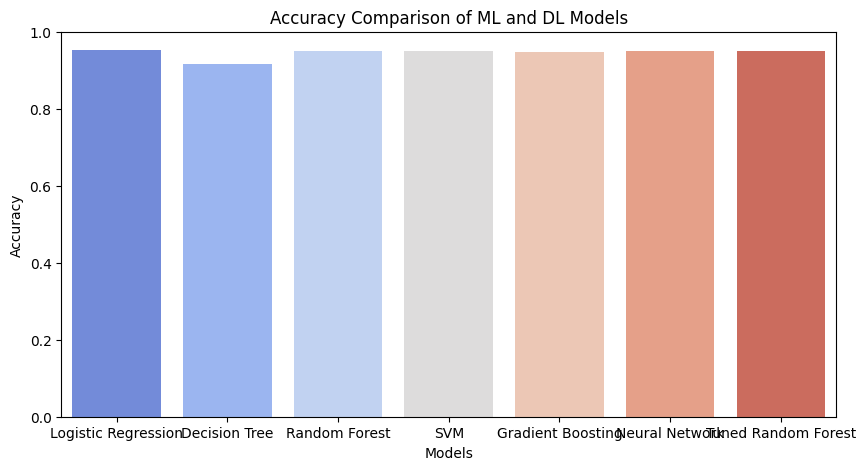

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML and DL Models")
plt.ylim(0, 1)
plt.show()


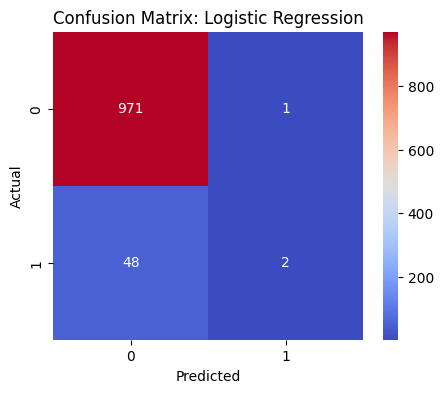

In [16]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d")
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


best_model_name = max(accuracies, key=accuracies.get)
plot_confusion_matrix(models[best_model_name], X_test, y_test, best_model_name)


AttributeError: This 'SVC' has no attribute 'predict_proba'

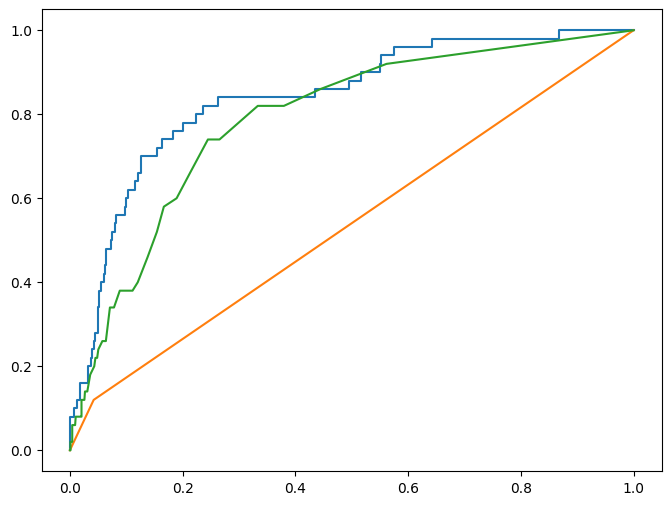

In [17]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for All Models")
plt.legend()
plt.show()


In [18]:
import joblib

best_model = models[best_model_name]
joblib.dump(best_model, "stroke_prediction_model.pkl")


['stroke_prediction_model.pkl']

Using Deep Learning Models

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')  
])


fcnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


fcnn_history = fcnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))





Epoch 1/30


/Users/rahulmarban/Documents/Coding/nextjs-fastapi/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7783 - loss: 0.4651 - val_accuracy: 0.9511 - val_loss: 0.2648
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9431 - loss: 0.2078 - val_accuracy: 0.9511 - val_loss: 0.1800
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9448 - loss: 0.1935 - val_accuracy: 0.9511 - val_loss: 0.1699
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9531 - loss: 0.1732 - val_accuracy: 0.9511 - val_loss: 0.1682
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1793 - val_accuracy: 0.9511 - val_loss: 0.1704
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9467 - loss: 0.1769 - val_accuracy: 0.9511 - val_loss: 0.1674
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.1772 - val_accuracy: 0.9511 - val_loss: 0.1693
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9507 - loss: 0.1622 - val_accuracy: 0.9511 - val_

In [22]:
import matplotlib.pyplot as plt

def plot_training_history(history, title="Training History"):
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1621 


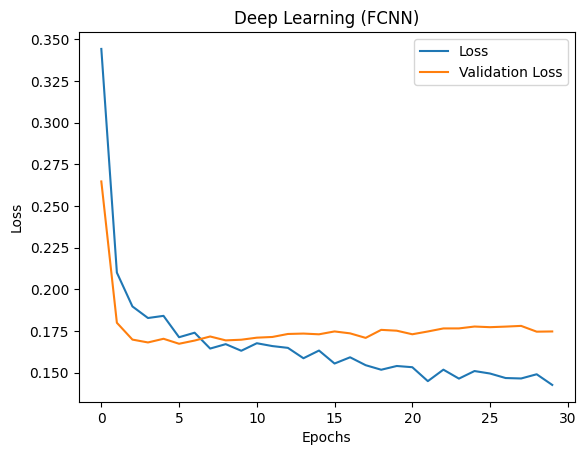

Neural Network Accuracy: 0.9511


In [23]:
test_loss, test_acc = fcnn_model.evaluate(X_test, y_test)

plot_training_history(fcnn_history, "Deep Learning (FCNN)")

print(f"Neural Network Accuracy: {test_acc:.4f}")


Epoch 1/30


/Users/rahulmarban/Documents/Coding/nextjs-fastapi/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8710 - loss: 0.3575 - val_accuracy: 0.9511 - val_loss: 0.1734
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9563 - loss: 0.1592 - val_accuracy: 0.9511 - val_loss: 0.1704
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1651 - val_accuracy: 0.9511 - val_loss: 0.1671
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1779 - val_accuracy: 0.9511 - val_loss: 0.1761
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9528 - loss: 0.1609 - val_accuracy: 0.9511 - val_loss: 0.1659
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9556 - loss: 0.1499 - val_accuracy: 0.9511 - val_loss: 0.1645
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9447 - loss: 0.1711 - val_accuracy: 0.9511 - val_loss: 0.1654
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - loss: 0.1593 - val_accuracy: 0.9511 - val

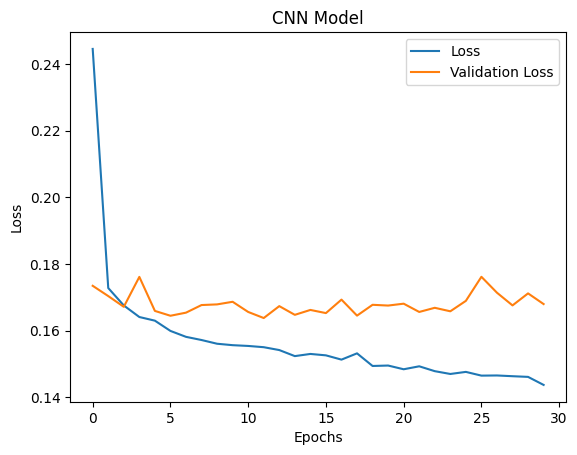

In [24]:
import numpy as np
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

# Reshape input data for CNN (Adding a 3rd dimension)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))

# Plot training history
plot_training_history(cnn_history, "CNN Model")


In [25]:
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {test_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.1530 
CNN Accuracy: 0.9501


Epoch 1/30


/Users/rahulmarban/Documents/Coding/nextjs-fastapi/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9151 - loss: 0.5110 - val_accuracy: 0.9511 - val_loss: 0.1733
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1754 - val_accuracy: 0.9511 - val_loss: 0.1659
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1604 - val_accuracy: 0.9511 - val_loss: 0.1640
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.1539 - val_accuracy: 0.9511 - val_loss: 0.1649
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9545 - loss: 0.1469 - val_accuracy: 0.9511 - val_loss: 0.1626
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.1397 - val_accuracy: 0.9511 - val_loss: 0.1642
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.1407 - val_accuracy: 0.9511 - val_loss: 0.1652
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.1528 - val_accuracy: 0.9511 - val_

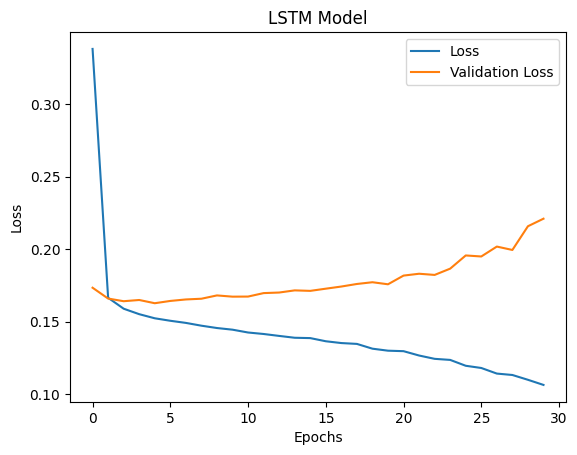

In [26]:
from tensorflow.keras.layers import LSTM

# Reshape input data for LSTM (Adding a 3rd dimension)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(32, activation='relu'),
    
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=30, batch_size=32, validation_data=(X_test_lstm, y_test))

# Plot training history
plot_training_history(lstm_history, "LSTM Model")


In [27]:
test_loss, test_acc = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Accuracy: {test_acc:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1950 
LSTM Accuracy: 0.9472


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)



SVC()

In [29]:
log_reg_accuracy = log_reg.score(X_test, y_test)
rf_accuracy = rf.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)

fcnn_accuracy = max(fcnn_history.history['val_accuracy'])
cnn_accuracy = max(cnn_history.history['val_accuracy'])
lstm_accuracy = max(lstm_history.history['val_accuracy'])


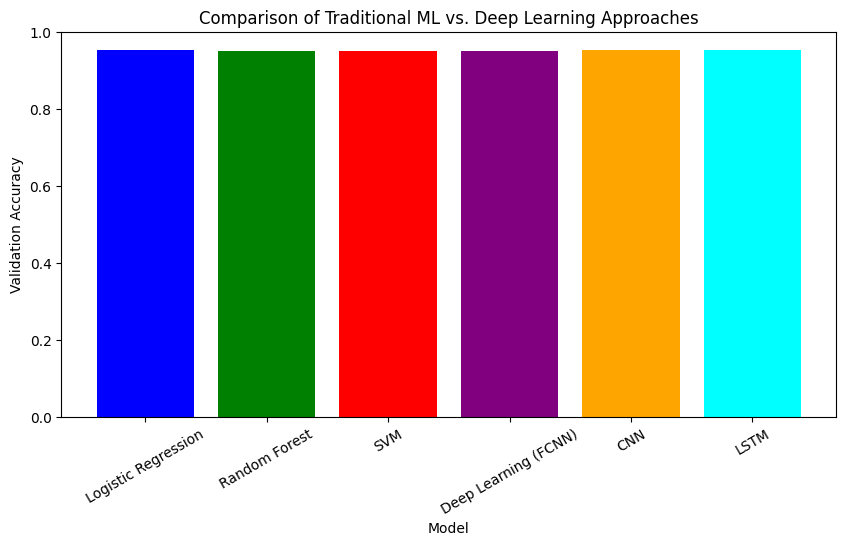

In [30]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Deep Learning (FCNN)", "CNN", "LSTM"],
    "Accuracy": [log_reg_accuracy, rf_accuracy, svm_accuracy, fcnn_accuracy, cnn_accuracy, lstm_accuracy]
})

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel("Model")
plt.ylabel("Validation Accuracy")
plt.title("Comparison of Traditional ML vs. Deep Learning Approaches")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


In [32]:
import keras_tuner as kt

def build_cnn_model(hp):
    model = Sequential([
        Conv1D(filters=hp.Choice('filters_1', [32, 64, 128]), kernel_size=hp.Choice('kernel_size', [3, 5]), 
               activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        
        Conv1D(filters=hp.Choice('filters_2', [32, 64]), kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        Flatten(),
        Dense(hp.Choice('dense_units', [32, 64]), activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_cnn_model, objective='val_accuracy', max_trials=10, directory='cnn_tuning')

tuner.search(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best CNN Hyperparameters: {best_hps.values}")


Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.951076328754425

Best val_accuracy So Far: 0.951076328754425
Total elapsed time: 00h 00m 59s
Best CNN Hyperparameters: {'filters_1': 128, 'kernel_size': 3, 'filters_2': 64, 'dense_units': 32}


In [33]:
def build_lstm_model(hp):
    model = Sequential([
        LSTM(hp.Choice('lstm_units_1', [32, 64, 128]), activation='relu', return_sequences=True, 
             input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(hp.Choice('lstm_units_2', [32, 64]), activation='relu'),
        Dense(hp.Choice('dense_units', [32, 64]), activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_lstm_model, objective='val_accuracy', max_trials=10, directory='lstm_tuning')

tuner.search(X_train_lstm, y_train, epochs=10, validation_data=(X_test_lstm, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM Hyperparameters: {best_hps.values}")


Trial 10 Complete [00h 00m 07s]
val_accuracy: 0.951076328754425

Best val_accuracy So Far: 0.951076328754425
Total elapsed time: 00h 01m 04s
Best LSTM Hyperparameters: {'lstm_units_1': 128, 'lstm_units_2': 64, 'dense_units': 32}


/Users/rahulmarban/Documents/Coding/nextjs-fastapi/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 1023it [01:27, 11.09it/s]                          


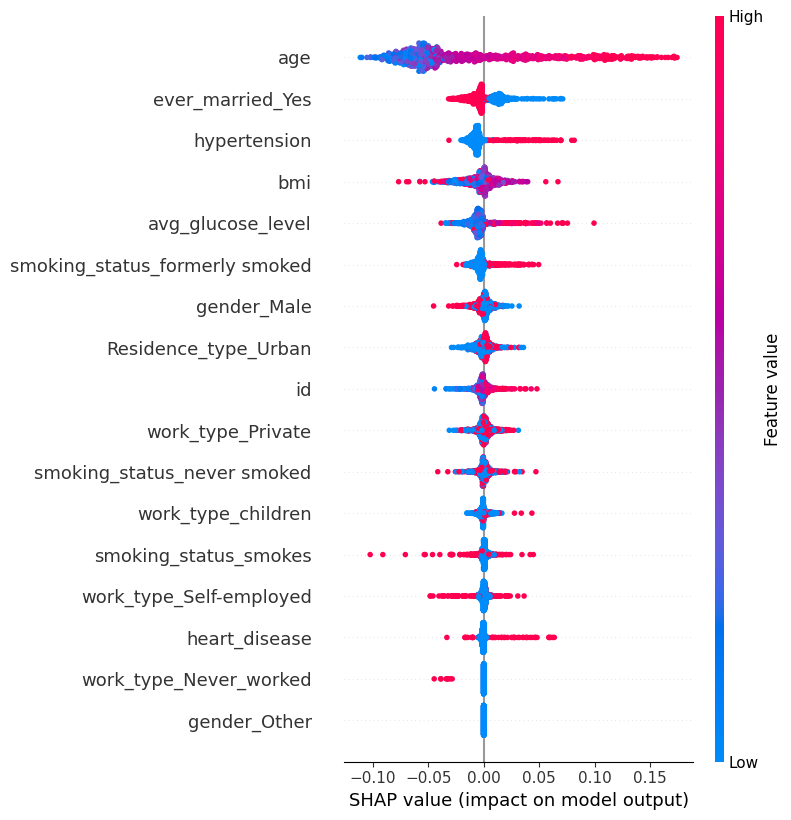

In [34]:
import shap

explainer = shap.Explainer(fcnn_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [43]:
import joblib
import os
from tensorflow.keras.models import load_model

# Create a directory to store models if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# === SAVE TRADITIONAL ML MODELS ===
joblib.dump(log_reg, "saved_models/logistic_regression.pkl")
joblib.dump(rf, "saved_models/random_forest.pkl")
joblib.dump(svm_model, "saved_models/svm_model.pkl")


cnn_model.save("saved_models/stroke_cnn_model.h5") 

print("✅ Traditional ML models saved successfully!")


# === SAVE DEEP LEARNING MODELS (HDF5 format) ===
fcnn_model.save("saved_models/fcnn_model.keras")
cnn_model.save("saved_models/cnn_model.keras")
lstm_model.save("saved_models/lstm_model.keras")

print("✅ Deep Learning models saved successfully (HDF5 format)!")

# === SAVE MODEL WEIGHTS ONLY (Optional) ===
cnn_model.save_weights("saved_models/cnn_weights.h5")
lstm_model.save_weights("saved_models/lstm_weights.h5")

print("✅ Model weights saved separately!")

# === SAVE MODELS IN TENSORFLOW SAVEDMODEL FORMAT (For Deployment) ===
fcnn_model.save("saved_models/fcnn_tf", save_format="tf")
cnn_model.save("saved_models/cnn_tf", save_format="tf")
lstm_model.save("saved_models/lstm_tf", save_format="tf")

print("✅ Models saved in TensorFlow SavedModel format for deployment!")


✅ Traditional ML models saved successfully!
✅ Deep Learning models saved successfully (HDF5 format)!


ValueError: The filename must end in `.weights.h5`. Received: filepath=saved_models/cnn_weights.h5

In [ ]:
# === LOAD TRADITIONAL ML MODELS ===
log_reg = joblib.load("saved_models/logistic_regression.pkl")
rf = joblib.load("saved_models/random_forest.pkl")
svm_model = joblib.load("saved_models/svm_model.pkl")

print("✅ Traditional ML models loaded successfully!")

# === LOAD DEEP LEARNING MODELS (HDF5 format) ===
fcnn_model = load_model("saved_models/fcnn_model.keras")
cnn_model = load_model("saved_models/cnn_model.keras")
lstm_model = load_model("saved_models/lstm_model.keras")

print("✅ Deep Learning models loaded successfully (HDF5 format)!")

# === LOAD MODEL WEIGHTS ONLY (Optional) ===
cnn_model.load_weights("saved_models/cnn_weights.h5")
lstm_model.load_weights("saved_models/lstm_weights.h5")

print("✅ Model weights loaded successfully!")

# === LOAD MODELS FROM TENSORFLOW SAVEDMODEL FORMAT ===
fcnn_model = load_model("saved_models/fcnn_tf")
cnn_model = load_model("saved_models/cnn_tf")
lstm_model = load_model("saved_models/lstm_tf")

print("✅ Models loaded from TensorFlow SavedModel format for deployment!")


✅ Traditional ML models loaded successfully!
✅ Deep Learning models loaded successfully (HDF5 format)!


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'saved_models/cnn_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)